In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import re
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df_ti_train=pd.read_csv("C:/Users/Augustin/Desktop/Dorset 23/DIA/Titanic/train.csv")
df_ti_test=pd.read_csv("C:/Users/Augustin/Desktop/Dorset 23/DIA/Titanic/test.csv")
df_ti_test_res=pd.read_csv("C:/Users/Augustin/Desktop/Dorset 23/DIA/Titanic/gender_submission.csv")

In [3]:
print(df_ti_train.columns.tolist())
print(df_ti_train.shape)
print(df_ti_test.columns.tolist())
print(df_ti_test.shape)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
(891, 12)
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
(418, 11)


In [4]:
print(df_ti_train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
df_ti_1=df_ti_train.drop("PassengerId", axis=1)
df_ti_1=df_ti_1.drop("Ticket", axis=1)
df_ti_2=df_ti_test.copy()
df_ti_2=df_ti_2.drop("Ticket", axis=1)

In [6]:
print(df_ti_1["Name"].head(20))

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [7]:
df_ti_1['Title'] = df_ti_1.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_ti_2['Title'] = df_ti_2.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
all_titles_1=df_ti_1['Title'].unique()
all_titles_2=df_ti_2['Title'].unique()
print(all_titles_1)
print(all_titles_2)
print(df_ti_1['Title'].value_counts())
print(df_ti_2['Title'].value_counts())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [8]:
titles_to_exclude = ['Mr', 'Mrs', 'Miss', 'Master']
filtered_titles_1 = df_ti_1.loc[~df_ti_1["Title"].isin(titles_to_exclude), "Title"].values
unique_titles_1 = np.unique(filtered_titles_1)
print(unique_titles_1)

filtered_titles_2 = df_ti_2.loc[~df_ti_2["Title"].isin(titles_to_exclude), "Title"].values
unique_titles_2 = np.unique(filtered_titles_2)
print(unique_titles_2)

['Capt' 'Col' 'Countess' 'Don' 'Dr' 'Jonkheer' 'Lady' 'Major' 'Mlle' 'Mme'
 'Ms' 'Rev' 'Sir']
['Col' 'Dona' 'Dr' 'Ms' 'Rev']


In [9]:
df_ti_1["Title"]=df_ti_1["Title"].replace('Mlle', 'Miss')
df_ti_1["Title"]=df_ti_1["Title"].replace('Ms', 'Miss')
df_ti_1["Title"]=df_ti_1["Title"].replace('Mme', 'Mrs')

df_ti_2["Title"]=df_ti_2["Title"].replace('Mlle', 'Miss')
df_ti_2["Title"]=df_ti_2["Title"].replace('Ms', 'Miss')
df_ti_2["Title"]=df_ti_2["Title"].replace('Mme', 'Mrs')

In [10]:
filtered_titles_1 = df_ti_1.loc[~df_ti_1["Title"].isin(titles_to_exclude), "Title"].values
unique_titles_1 = np.unique(filtered_titles_1)
print(unique_titles_1)
filtered_titles_2 = df_ti_2.loc[~df_ti_2["Title"].isin(titles_to_exclude), "Title"].values
unique_titles_2 = np.unique(filtered_titles_2)
print(unique_titles_2)
df_ti_1["Title"]=df_ti_1["Title"].replace(unique_titles_1, 'Rare')
df_ti_2["Title"]=df_ti_2["Title"].replace(unique_titles_2, 'Rare')

['Capt' 'Col' 'Countess' 'Don' 'Dr' 'Jonkheer' 'Lady' 'Major' 'Rev' 'Sir']
['Col' 'Dona' 'Dr' 'Rev']


In [11]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_ti_1['Title'] = df_ti_1['Title'].map(titles)
df_ti_1['Title'] = df_ti_1['Title'].fillna(0)

df_ti_2['Title'] = df_ti_2['Title'].map(titles)
df_ti_2['Title'] = df_ti_2['Title'].fillna(0)

In [12]:
df_ti_1=df_ti_1.drop("Name", axis=1)
df_ti_2=df_ti_2.drop("Name", axis=1)

In [13]:
sexs={"male":0, "female":1}
df_ti_1["Sex"]=df_ti_1["Sex"].map(sexs)
df_ti_2["Sex"]=df_ti_2["Sex"].map(sexs)

In [14]:
age_intervals = {range(0,10): 1, range(10,20): 2, range(20,30): 3, range(30,45): 4, range(45,60): 5, range(60,100): 6}
for df in [df_ti_1, df_ti_2]:
    df['Age']=df['Age'].apply(lambda x: next((v for k, v in age_intervals.items() if x in k), 0))
    df['Age']=df['Age'].astype(int)
    df['Age']=df['Age'].fillna(0)
print(df_ti_1['Age'].head())
print(df_ti_1['Age'].value_counts())

0    3
1    4
2    3
3    4
4    4
Name: Age, dtype: int32
Age
3    215
4    207
0    202
2    101
5     86
1     55
6     25
Name: count, dtype: int64


In [15]:
df_ti_1['Relatives']=df_ti_1['SibSp']+df_ti_1['Parch']
df_ti_2['Relatives']=df_ti_2['SibSp']+df_ti_2['Parch']

In [16]:
df_ti_1['Fare']=df_ti_1['Fare'].fillna(0)
df_ti_1['Fare']=df_ti_1['Fare'].astype(int)
df_ti_2['Fare']=df_ti_2['Fare'].fillna(0)
df_ti_2['Fare']=df_ti_2['Fare'].astype(int)
quartiles = np.round(np.percentile(df_ti_1['Fare'].dropna(), [25, 50, 75])).astype(int)
print(quartiles)
for df_ti in [df_ti_1, df_ti_2]:
    df_ti.loc[df_ti['Fare']<=quartiles[0], 'Fare']=0
    df_ti.loc[(df_ti['Fare']>quartiles[0]) & (df_ti['Fare']<=quartiles[1]), 'Fare']=1
    df_ti.loc[(df_ti['Fare']>quartiles[1]) & (df_ti['Fare']<=quartiles[2]), 'Fare']=2
    df_ti.loc[df_ti['Fare']>quartiles[2], 'Fare']=3
    df_ti['Fare']=df_ti['Fare'].astype(int)
    df_ti['Fare']=df_ti['Fare'].fillna(0)
print(df_ti_1['Fare'].value_counts())

[ 7 14 31]
Fare
0    241
2    223
1    216
3    211
Name: count, dtype: int64


In [17]:
print(df_ti_1['Cabin'].head(100))

0         NaN
1         C85
2         NaN
3        C123
4         NaN
       ...   
95        NaN
96         A5
97    D10 D12
98        NaN
99        NaN
Name: Cabin, Length: 100, dtype: object


In [18]:
print(df_ti_1['Cabin'].dropna().str.extract(r'([a-zA-Z])', expand=False).unique())
print(df_ti_1['Cabin'].isna().sum())
print(df_ti_1['Cabin'].dropna().str.extract(r'([a-zA-Z])', expand=False).value_counts())

['C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
687
Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64


In [19]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, ("G", "T"): 7, "U": 8}
for df in [df_ti_1, df_ti_2]:
    df['Cabin']=df['Cabin'].fillna('U0')
    df['Deck']=df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group() if re.compile("([a-zA-Z]+)").search(x) else 'U')
    df['Deck']=df['Deck'].map(deck)
    df['Deck']=df['Deck'].fillna(0)
    df['Deck']=df['Deck'].astype(int)
    print(df.head())
df_ti_1=df_ti_1.drop("Cabin", axis=1)
df_ti_2=df_ti_2.drop("Cabin", axis=1)

   Survived  Pclass  Sex  Age  SibSp  Parch  Fare Cabin Embarked  Title  \
0         0       3    0    3      1      0     0    U0        S      1   
1         1       1    1    4      1      0     3   C85        C      3   
2         1       3    1    3      0      0     0    U0        S      2   
3         1       1    1    4      1      0     3  C123        S      3   
4         0       3    0    4      0      0     1    U0        S      1   

   Relatives  Deck  
0          1     8  
1          1     3  
2          0     8  
3          1     3  
4          0     8  
   PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare Cabin Embarked  Title  \
0          892       3    0    0      0      0     0    U0        Q      1   
1          893       3    1    5      1      0     0    U0        S      3   
2          894       2    0    6      0      0     1    U0        Q      1   
3          895       3    0    3      0      0     1    U0        S      1   
4          896       3    1    3 

In [20]:
print(df_ti_1['Deck'].head())

0    8
1    3
2    8
3    3
4    8
Name: Deck, dtype: int32


In [21]:
emb_1=df_ti_1['Embarked'].unique()
print(emb_1)
print(df_ti_1['Embarked'].value_counts())

['S' 'C' 'Q' nan]
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [22]:
for df in [df_ti_1, df_ti_2]:
    df['Embarked']=df['Embarked'].fillna('S')
emb_places={'S':0, 'C':1, 'Q':2}
for df in [df_ti_1, df_ti_2]:
    df['Embarked']=df["Embarked"].map(emb_places)
    df['Embarked']=df["Embarked"].astype(int)

In [23]:
for df in [df_ti_1, df_ti_2]:
    df['Fare_per_head']=df['Fare']/(df['Relatives']+1)

In [24]:
X_train=df_ti_1.drop("Survived", axis=1)
y_train=df_ti_1["Survived"]
X_test=df_ti_2.drop("PassengerId", axis=1).copy()
y_test=df_ti_test_res["Survived"]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       266
           1       0.95      0.95      0.95       152

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



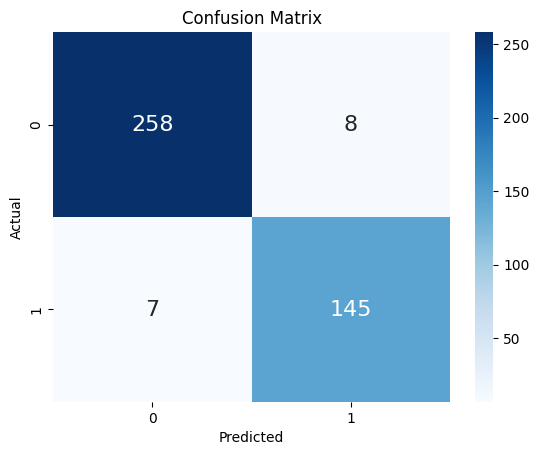

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

In [26]:
rfc = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

0.9641148325358851
0.8014354066985646


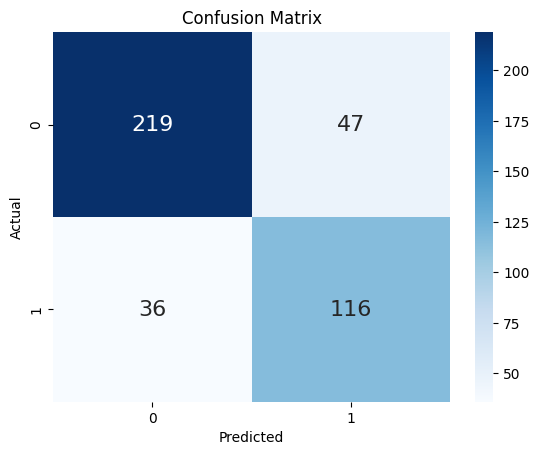

In [27]:
y_pred_2=rfc.predict(X_test)
conf_matrix_2=confusion_matrix(y_test, y_pred_2)
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
score=metrics.accuracy_score(y_pred, y_test)
score2=metrics.accuracy_score(y_pred_2, y_test)
print(score)
print(score2)

In [37]:
classifier=GridSearchCV(LogisticRegression(), 
                        {'C':[0.001, 0.01, 0.1, 1, 10, 100]}, 
                       cv=5, 
                       return_train_score=False)
classifier.fit(X_train, y_train)
df_cl=pd.DataFrame(classifier.cv_results_)
df_cl[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.689147
1,0.01,0.754246
2,0.1,0.796843
3,1,0.790139
4,10,0.790139
5,100,0.790139


In [38]:
print(classifier.best_params_)
print(classifier.best_score_)

{'C': 0.1}
0.7968426338585148
